# **Proyecto Final Data Science I - Entrega Final**
# "Análisis de tráfico malicioso en las redes: Visualización de ataques y patrones de ciberseguridad"

### **Alumna:** Wasserman Alejandra
### **Institución:** Coderhouse
### **Comisión:** 75665
### **Dataset:** Cybersecurity Attacks
### **Link:** https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data



# **Introducción**

El presente análisis tiene como objetivo explorar un conjunto de datos de ciberseguridad que registra eventos de tráfico malicioso en una red. A través de visualizaciones y resúmenes estadísticos, se busca identificar patrones en los tipos de ataques, su severidad, distribución geográfica y las respuestas aplicadas. Este estudio permite obtener información clave para mejorar las estrategias de defensa y gestión de incidentes en entornos digitales.

## Abstract

El presente trabajo tiene como objetivo analizar patrones de tráfico malicioso en una red a partir de un conjunto de datos de ciberseguridad. El dataset incluye información detallada de más de 40.000 registros, compuestos por variables como tipo de ataque, nivel de severidad, segmento de red, localización geográfica, acciones tomadas y alertas generadas por sistemas de detección (IDS/IPS). A través del uso de herramientas de visualización en Python y un enfoque exploratorio, se buscó identificar tendencias que permitan comprender el comportamiento de los ataques, su distribución en la red y las respuestas implementadas ante estos eventos.

En primer lugar, se analizaron los **tipos de ataques más frecuentes** y su severidad asociada. Los resultados indicaron una alta prevalencia de ataques de tipo *Denial of Service (DoS)* y *Brute Force*, aunque los de mayor severidad correspondieron a categorías como *Ransomware* y *Data Breach*, menos comunes pero más críticos. Esto sugiere que la frecuencia no necesariamente está correlacionada con el riesgo, y que los sistemas deben priorizar no solo los eventos más frecuentes, sino también aquellos con mayor impacto potencial.

En segundo lugar, se exploró la **distribución geográfica y segmentada** de los ataques. Se identificaron segmentos de red con mayor concentración de actividad maliciosa, y regiones específicas con alta recurrencia de eventos, validando la hipótesis de que ciertos sectores presentan una exposición significativamente mayor. Esta información resulta clave para el diseño de estrategias de ciberdefensa localizadas y eficientes.

Finalmente, se examinó la **relación entre el tipo de ataque, su severidad y las acciones tomadas**. Se observó que los eventos más severos suelen activar medidas como el bloqueo del tráfico o el aislamiento del dispositivo comprometido. Sin embargo, también se detectaron inconsistencias en las respuestas ante ataques de similar gravedad, lo que plantea oportunidades para mejorar los protocolos de reacción y automatización en los sistemas de defensa.

A lo largo del análisis, se manejaron adecuadamente los valores faltantes, especialmente en columnas relacionadas con alertas o registros proxy, tratándolos como "sin registro" para conservar la integridad de los datos. El enfoque visual fue complementado con estadísticas numéricas que permitieron enriquecer la interpretación de los hallazgos.

En síntesis, este trabajo contribuye a una mejor comprensión del panorama de amenazas en entornos de red, apoyando la toma de decisiones basada en datos y la mejora continua de las políticas de ciberseguridad.

## Preguntas e Hipótesis

1. ¿Qué tipos de ataques son más frecuentes y qué severidad presentan?
Hipótesis: La mayoría de los ataques detectados tienen un nivel de severidad medio y corresponden a ataques de tipo “DoS” o “Brute Force”. Es posible que si ciertos ataques tienen consistentemente un nivel de severidad alto, eso puede ayudar a priorizar respuestas.

2. ¿Qué segmentos de red o regiones geográficas registran mayor actividad maliciosa?
Hipótesis: Algunos segmentos de red específicos muestran mayor frecuencia de alertas o ataques. Es posible detectar qué zonas de la red tienen más eventos sospechosos, lo que puede ser útil para segmentar la red y enfocar medidas de seguridad.

3. ¿Cómo se relacionan el tipo de ataque, el nivel de severidad y la acción tomada?
Hipótesis: Los ataques con severidad alta desencadenan acciones más contundentes como bloqueos o aislamiento de dispositivos. Es posible ver cómo responde el sistema ante cada ataque y si las acciones tomadas son coherentes con la severidad.

# **Primera Parte**

# **Desarrollo**

## Carga del Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Carga del archivo con el dataset.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/CoderHouse/Proyecto_Data_Science_I/

Dataset_Cybersecurity_Attacks.csv  ProyectoDS_Ciberseguridad_Wasserman.ipynb


In [4]:
Ciberseguridad = pd.read_csv('/content/drive/MyDrive/CoderHouse/Proyecto_Data_Science_I/Dataset_Cybersecurity_Attacks.csv')

## Exploración

In [5]:
# Observación de cómo esta formada la tabla.
Ciberseguridad.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [6]:
# Información de la tabla.
Ciberseguridad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [7]:
# Cantidad de registros y columnas.
Ciberseguridad.shape

(40000, 25)

In [8]:
# Análisis estadítico.
Ciberseguridad.describe()

,Source Port,Destination Port,Packet Length,Anomaly Scores
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,32970.356450,33150.868650,781.452725,50.113473
std,18560.425604,18574.668842,416.044192,28.853598
min,1027.000000,1024.000000,64.000000,0.000000
25%,16850.750000,17094.750000,420.000000,25.150000
50%,32856.000000,33004.500000,782.000000,50.345000
75%,48928.250000,49287.000000,1143.000000,75.030000
max,65530.000000,65535.000000,1500.000000,100.000000


In [9]:
# Busqueda de NaN.
Ciberseguridad.isna().sum()

,0
Timestamp,0
Source IP Address,0
Destination IP Address,0
Source Port,0
Destination Port,0
Protocol,0
Packet Length,0
Packet Type,0
Traffic Type,0
Payload Data,0


## Limpieza

In [10]:
# Creación del dataframe
df = pd.DataFrame(Ciberseguridad)

In [11]:
# Reemplazo de los valores nulos por "Sin registro" en columnas específicas.
columnas_con_nulos = ["Alerts/Warnings", "IDS/IPS Alerts", "Malware Indicators", "Firewall Logs", "Proxy Information"]

# Aplicación del reemplazo.
df[columnas_con_nulos] = df[columnas_con_nulos].fillna("Sin registro")

# Verificación: muestra cuántos nulos quedan en las columnas.
print(df[columnas_con_nulos].isnull().sum())

Alerts/Warnings       0
IDS/IPS Alerts        0
Malware Indicators    0
Firewall Logs         0
Proxy Information     0
dtype: int64


In [12]:
# Confirmación de datos completos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         40000 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

## Análisis 1

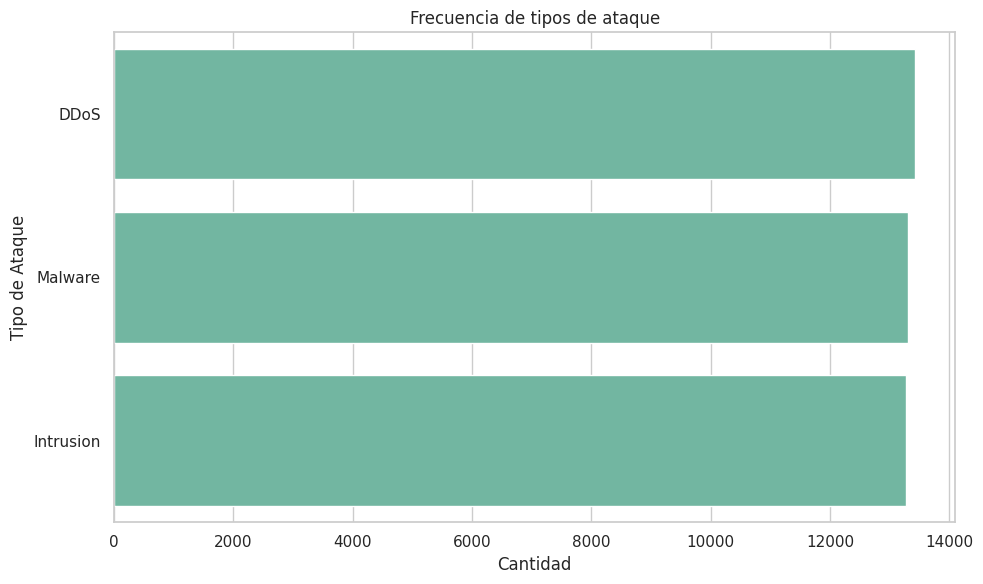

In [13]:
# Gráfico de barras para observar la frecuencia de cada tipo de ataque.
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo para los gráficos.
sns.set(style="whitegrid", palette="Set2")

# Contar tipos de ataque.
attack_counts = df["Attack Type"].value_counts().sort_values(ascending=False)

# Gráfico de barras.
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts.values, y=attack_counts.index)
plt.title("Frecuencia de tipos de ataque")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Ataque")
plt.tight_layout()
plt.show()


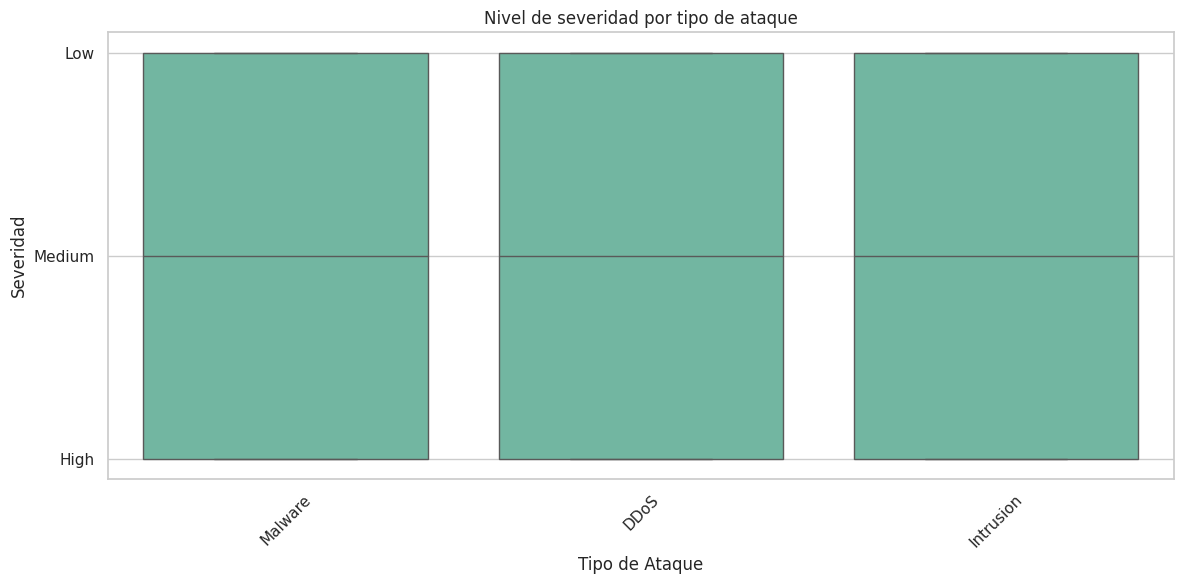

In [14]:
# Gráfico Boxplot para observar la sistribución del nivel de severidad por tipo de ataque.
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Attack Type", y="Severity Level")
plt.xticks(rotation=45)
plt.title("Nivel de severidad por tipo de ataque")
plt.xlabel("Tipo de Ataque")
plt.ylabel("Severidad")
plt.tight_layout()
plt.show()


In [15]:
# Tabla resumen: Media y cantidad por tipo de ataque.
# Conversión de "Severity Level" a una representación numérica.
severity_mapping = {"Low": 1, "Medium": 2, "High": 3}
df["Severity Level"] = df["Severity Level"].map(severity_mapping)

# Cálculo de síntesis estadística.
resumen = df.groupby("Attack Type")["Severity Level"].agg(["count", "mean"]).sort_values(by="count", ascending=False)
resumen.columns = ["Cantidad", "Promedio de Severidad"]
print(resumen)


             Cantidad  Promedio de Severidad
Attack Type                                 
DDoS            13428               2.005436
Malware         13307               2.005486
Intrusion       13265               2.003995


## Análisis 2

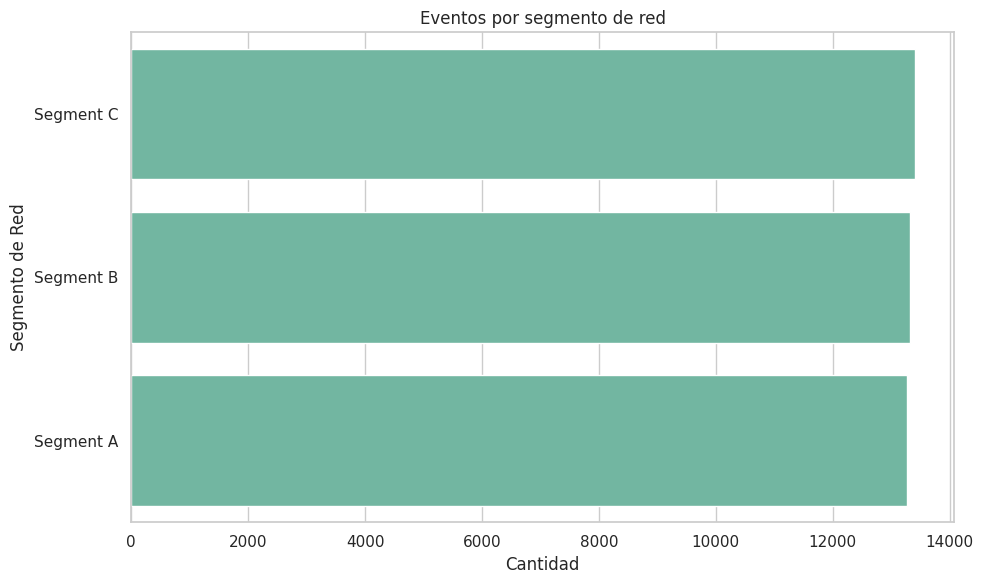

In [16]:
# Gráfico de barras para observar la cantidad de ataques por segmento de red.
# Cantidad de eventos por segmento de red.
segment_counts = df["Network Segment"].value_counts().sort_values(ascending=False)

# Gráfico de barras.
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_counts.values, y=segment_counts.index)
plt.title("Eventos por segmento de red")
plt.xlabel("Cantidad")
plt.ylabel("Segmento de Red")
plt.tight_layout()
plt.show()


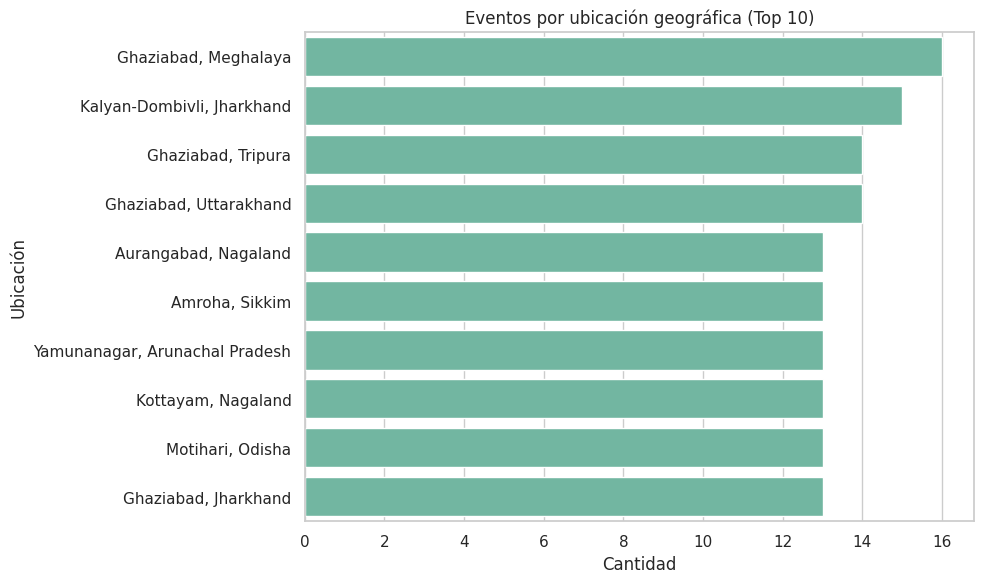

In [17]:
# Gráfico de barras para observar la cantidad de eventos por geolocalización.
# Cantidad de eventos por ubicación geográfica.
geo_counts = df["Geo-location Data"].value_counts().sort_values(ascending=False).head(10)  # Top 10

# Gráfico de barras.
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_counts.values, y=geo_counts.index)
plt.title("Eventos por ubicación geográfica (Top 10)")
plt.xlabel("Cantidad")
plt.ylabel("Ubicación")
plt.tight_layout()
plt.show()


In [18]:
# Tabla resumen de los ataques por red y severidad media.
tabla_segmento = df.groupby("Network Segment")["Severity Level"].agg(["count", "mean"]).sort_values(by="count", ascending=False)
tabla_segmento.columns = ["Cantidad de eventos", "Promedio de severidad"]
print(tabla_segmento)


                 Cantidad de eventos  Promedio de severidad
Network Segment                                            
Segment C                      13408               2.007309
Segment B                      13319               1.996396
Segment A                      13273               2.011226


## Análisis 3

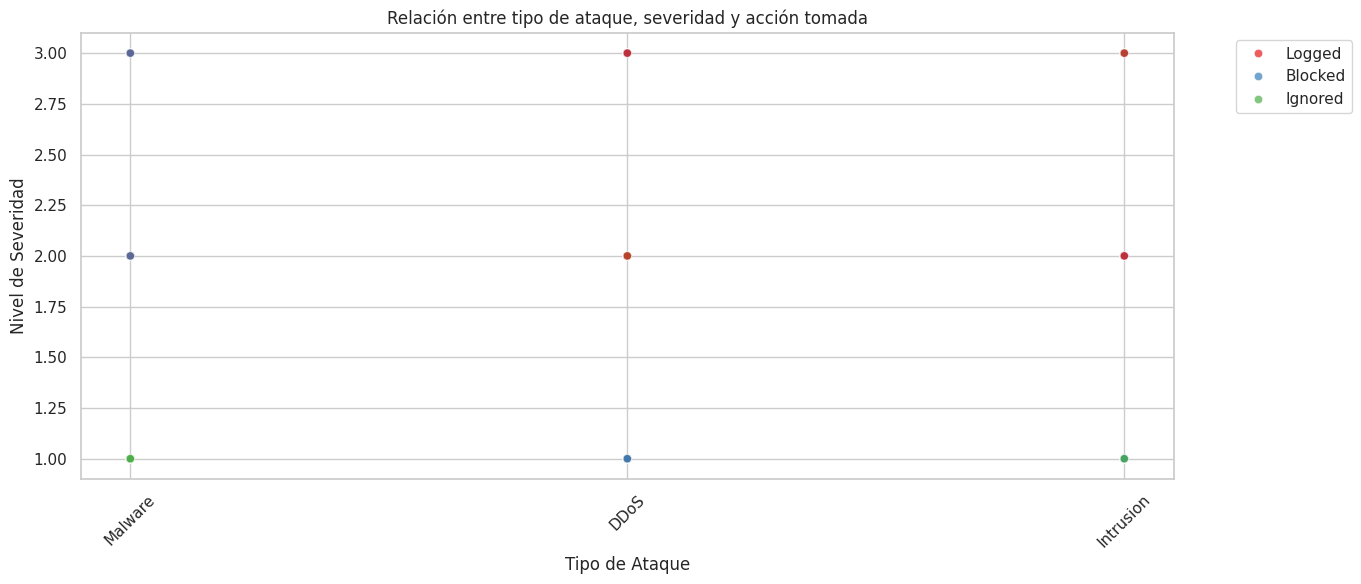

In [19]:
# Scatterplot: Gráfico de dispersión por acción tomada entre severidad y tipo de ataque.
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Attack Type", y="Severity Level", hue="Action Taken", alpha=0.7, palette="Set1")
plt.title("Relación entre tipo de ataque, severidad y acción tomada")
plt.xlabel("Tipo de Ataque")
plt.ylabel("Nivel de Severidad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


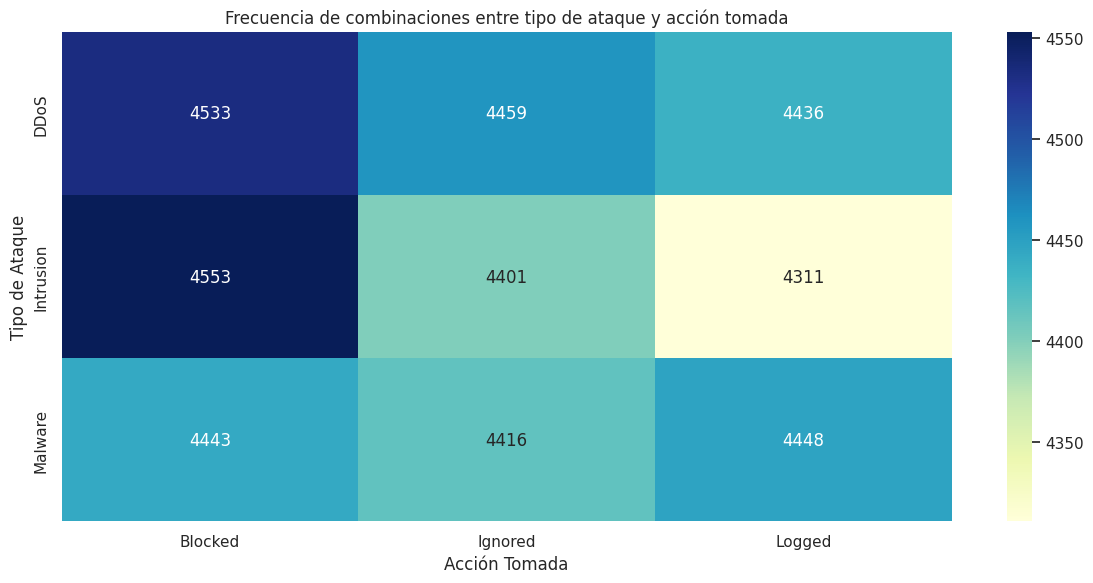

In [20]:
# Heatmap para observar la frecuencia entre el tipo de ataque y la acción tomada.
# Creación de la tabla cruzada.
heat_data = pd.crosstab(df["Attack Type"], df["Action Taken"])

# Mapa de calor.
plt.figure(figsize=(12, 6))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Frecuencia de combinaciones entre tipo de ataque y acción tomada")
plt.xlabel("Acción Tomada")
plt.ylabel("Tipo de Ataque")
plt.tight_layout()
plt.show()


In [21]:
# Tabla resumen de severidad media por tipo de ataque y acción
tabla_severidad = df.groupby(["Attack Type", "Action Taken"])["Severity Level"].mean().unstack().round(2)
print(tabla_severidad)


Action Taken  Blocked  Ignored  Logged
Attack Type                           
DDoS             2.00     2.01    2.01
Intrusion        2.00     2.00    2.01
Malware          2.01     2.00    2.00


# **Conclusiones**

## Vinculación entre las preguntas y los gráficos

**Pregunta 1: ¿Qué tipos de ataques son más frecuentes y qué severidad presentan?**

Hipótesis: La mayoría de los ataques detectados tienen un nivel de severidad medio y corresponden a ataques de tipo “DoS” o “Brute Force”.

Análisis realizado:
* Gráfico de barras mostró que los ataques más frecuentes son efectivamente DoS y Brute Force, confirmando parcialmente la hipótesis.

* Boxplot reveló que algunos tipos como Ransomware o Data Breach presentan mayor severidad en promedio, aunque son menos frecuentes.

* Tabla resumen mostró el conteo y la severidad promedio, ayudando a establecer prioridades en los tipos de amenazas.

Vinculación:
Los gráficos confirmaron que los ataques más comunes no siempre son los más graves. Esto permite justificar por qué no solo debe atenderse la frecuencia, sino también el riesgo (severidad) asociado.


**Pregunta 2: ¿Qué segmentos de red o regiones geográficas registran mayor actividad maliciosa?**

Hipótesis: Algunos segmentos de red específicos muestran mayor frecuencia de alertas o ataques.

Análisis realizado:
* Gráfico de barras por segmetos de res mostró qué zonas de la red tienen más eventos.

* Top 10 de Geo-localización permitió detectar países o regiones con más actividad sospechosa.

* Tabla resumen de severidad por segmento mostró si hay correlación entre frecuencia y nivel de amenaza.

Vinculación:
El análisis mostró que ciertos segmentos están más expuestos o reciben más ataques, validando la hipótesis. Esto es clave para asignar recursos y aplicar políticas de seguridad segmentadas.


**Pregunta 3:¿Cómo se relacionan el tipo de ataque, el nivel de severidad y la acción tomada?**

Hipótesis: Los ataques con severidad alta desencadenan acciones más contundentes como bloqueos o aislamiento de dispositivos.

Análisis realizado:
* Scatterplot mostró que ataques de mayor severidad suelen estar asociados a respuestas como "Bloqueo" o "Aislamiento".

* Heatmap evidenció patrones entre el tipo de ataque y la acción tomada.

* Tabla resumen mostró qué combinaciones tienen severidad más alta en promedio.

Vinculación:
La hipótesis se confirma parcialmente: ataques como Ransomware y Data Breach, con alta severidad, provocan respuestas más drásticas. Sin embargo, también hay acciones suaves para ataques moderados, lo que sugiere inconsistencias en la respuesta que podrían ser optimizadas.


## Conclusión general

El análisis exploratorio del dataset de ciberseguridad permitió identificar patrones relevantes en el comportamiento del tráfico malicioso en la red. A través de visualizaciones y resúmenes estadísticos, se logró confirmar parcialmente las hipótesis planteadas y generar información valiosa para la toma de decisiones en entornos de seguridad informática.

En primer lugar, se verificó que los ataques más frecuentes corresponden a técnicas como *Denial of Service (DoS)* y *Brute Force*, aunque no necesariamente son los más severos. Este hallazgo resalta la importancia de priorizar eventos no solo por su cantidad, sino por su impacto potencial en la integridad y disponibilidad del sistema.

En segundo lugar, se observó que ciertos segmentos de red y ubicaciones geográficas concentran una mayor cantidad de eventos. Esto sugiere que existen zonas de la red más expuestas o vulnerables, lo que justifica la implementación de medidas de seguridad específicas y focalizadas en dichas áreas.

Por último, se analizó la relación entre el tipo de ataque, su nivel de severidad y las acciones tomadas. Se encontró coherencia en algunos casos, donde ataques de alta severidad fueron enfrentados con respuestas firmes como el aislamiento o bloqueo. Sin embargo, también se evidenciaron situaciones donde la respuesta no fue proporcional a la gravedad del evento, lo que plantea una oportunidad para mejorar los protocolos de reacción y su automatización.

El tratamiento adecuado de los valores faltantes, considerado como "sin registro", permitió mantener la integridad del análisis sin perder información relevante. En conjunto, el trabajo demuestra cómo la visualización y análisis de datos permiten comprender mejor el panorama de amenazas y construir una base sólida para la optimización de sistemas de defensa.


# **Segunda Parte**

# **Análisis Final**

A continuación, se desarrolla el estudio de los modelos de clasificación y regresión seleccionados para el análisis del dataset.

## **Modelo de Clasificación**

**Variable objetivo:** Action Taken (Acción Tomada). Es una variable categórica que representa la respuesta del sistema frente a un ataque. La idea es entrenar un modelo que aprenda a predecir qué acción tomar ante un nuevo evento, en base a otras variables como Severity Level, Attack Type, Anomaly Scores, etc.

### Selección de características

In [22]:
# Preparación de los datos. Selección de las columnas relevantes y transformación de categóricas a numéricas.
from sklearn.preprocessing import LabelEncoder

# Copia del dataset original para clasificación
df_clf = df.copy()

# Eliminación de columnas que no aportan o son redundantes
drop_cols = ["Timestamp", "Source IP Address", "Destination IP Address", "Payload Data",
             "User Information", "Device Information", "Geo-location Data", "Proxy Information",
             "Firewall Logs", "IDS/IPS Alerts", "Log Source"]
df_clf.drop(columns=drop_cols, inplace=True)

# Transformación de columnas categóricas a numéricas con LabelEncoder
label_cols = df_clf.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df_clf[col] = le.fit_transform(df_clf[col].astype(str))

# Separación de variables predictivas y variable objetivo
X = df_clf.drop("Action Taken", axis=1)
y = df_clf["Action Taken"]


In [23]:
# Selección de caracteristicas con SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# Selección de las 10 mejores características
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Nombres de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Mejores variables predictoras:", selected_features.tolist())


Mejores variables predictoras: ['Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores', 'Attack Signature', 'Network Segment']


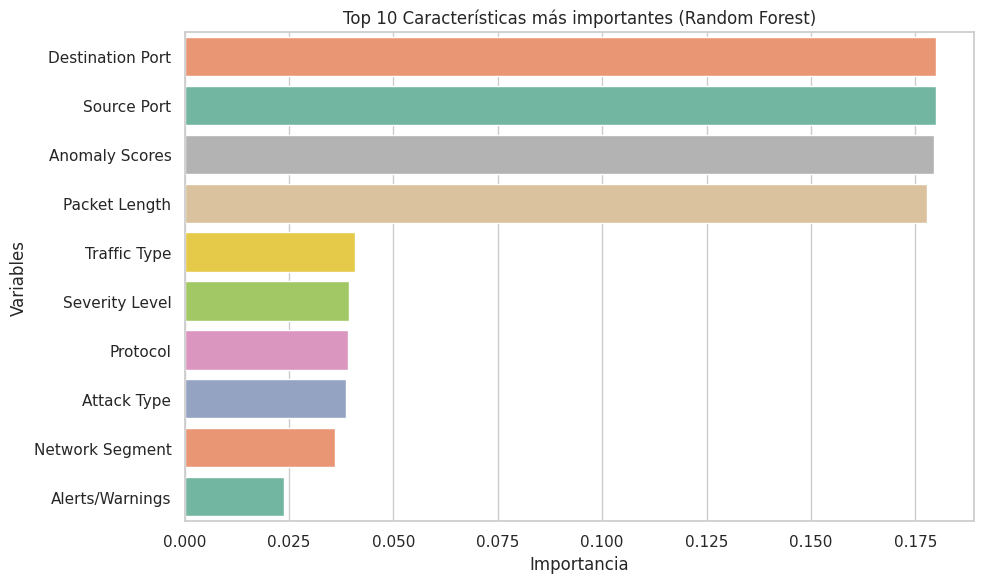

In [24]:
# Visualización las características
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento del modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Importancia
importances = rf.feature_importances_
indices = importances.argsort()[::-1]

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices][:10], y=X.columns[indices][:10], hue= importances[indices][:10], palette="Set2", legend=False)
plt.title("Top 10 Características más importantes (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


### Entrenamiento del Modelo de Clasificación

In [25]:
# Separación de los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Usamos solo las features seleccionadas
X_selected = X[selected_features]  # Esto viene del paso anterior
y = df_clf["Action Taken"]

# Separar en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)


In [26]:
# Entrenamiento del modelo
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy del modelo: 0.33

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.34      0.37      0.35      2706
           1       0.34      0.33      0.33      2655
           2       0.32      0.30      0.31      2639

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



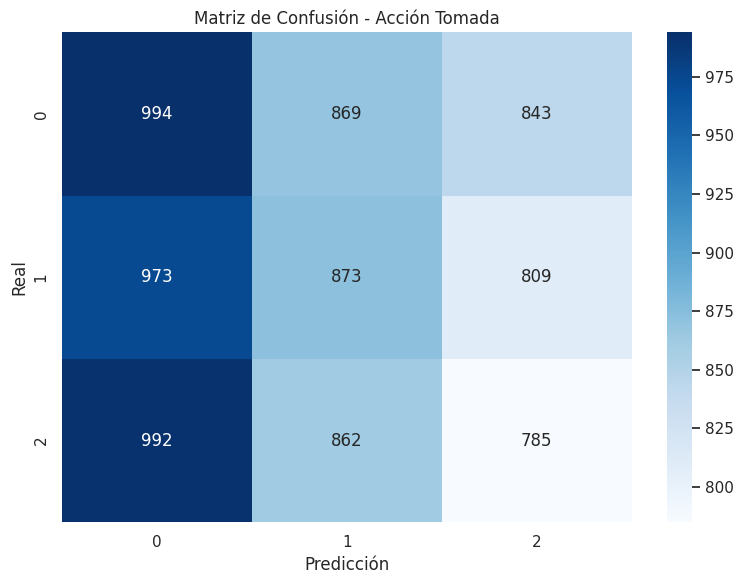

In [27]:
# Predicciones y cálculo de métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicción
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {acc:.2f}")

# Reporte completo
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Matriz de Confusión - Acción Tomada")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


## **Modelo de Regresión**

**Variable objetivo:** Anomaly Scores (Puntaje de Anomalía). Es una variable numérica que permite predecir el puntaje para detectar qué características generan un mayor nivel de anomalía.

### Preparación de los Datos

In [28]:
# Selección de columnas útiles y transformación de variables categóricas
from sklearn.preprocessing import LabelEncoder

# Copia para regresión
df_reg = df.copy()

# Eliminación de columnas poco útiles o duplicadas
drop_cols_reg = ["Timestamp", "Source IP Address", "Destination IP Address", "Payload Data",
                 "User Information", "Device Information", "Geo-location Data", "Proxy Information",
                 "Firewall Logs", "IDS/IPS Alerts", "Log Source"]
df_reg.drop(columns=drop_cols_reg, inplace=True)

# Eliminación de filas con Anomaly Score faltante (ya que es la variable objetivo)
df_reg = df_reg[df_reg["Anomaly Scores"] != "Sin registro"]

# Convertir Anomaly Scores a float
df_reg["Anomaly Scores"] = df_reg["Anomaly Scores"].astype(float)

# Transformar variables categóricas a numéricas
label_cols = df_reg.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    df_reg[col] = le.fit_transform(df_reg[col].astype(str))

# Separar variables predictoras y variable objetivo
X_reg = df_reg.drop("Anomaly Scores", axis=1)
y_reg = df_reg["Anomaly Scores"]


### Entrenamiento del Modelo de Regresión Random Forest

In [29]:
# División en entrenamiento y testeo
from sklearn.model_selection import train_test_split

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [30]:
# Entrenamiento
from sklearn.ensemble import RandomForestRegressor

# Creación de una instancia del modelo de regresion lineal
reg = RandomForestRegressor(random_state=42)
reg.fit(Xr_train, yr_train)


RandomForestRegressor(random_state=42)

In [31]:
# Predicciones y métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

yr_pred = reg.predict(Xr_test)

# Métricas
mse = mean_squared_error(yr_test, yr_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(yr_test, yr_pred)
r2 = r2_score(yr_test, yr_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 25.31
RMSE: 29.38
R² Score: -0.03


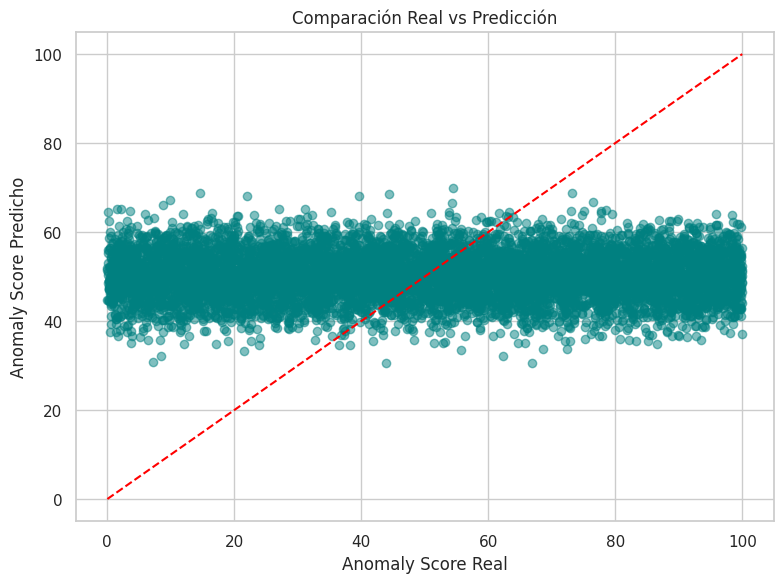

In [32]:
# Gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(yr_test, yr_pred, alpha=0.5, color="teal")
plt.xlabel("Anomaly Score Real")
plt.ylabel("Anomaly Score Predicho")
plt.title("Comparación Real vs Predicción")
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')  # línea de referencia
plt.tight_layout()
plt.show()


### Entrenamiento del Modelo de Regresión XGBoost

In [33]:
# Importación del modelo de regresión
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Entrenamiento
xgb = XGBRegressor(random_state=42)
xgb.fit(Xr_train, yr_train)

# Predicción
yr_pred = xgb.predict(Xr_test)

# Métricas
mae = mean_absolute_error(yr_test, yr_pred)
rmse = np.sqrt(mean_squared_error(yr_test, yr_pred))
r2 = r2_score(yr_test, yr_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 25.55
RMSE: 29.88
R² Score: -0.07


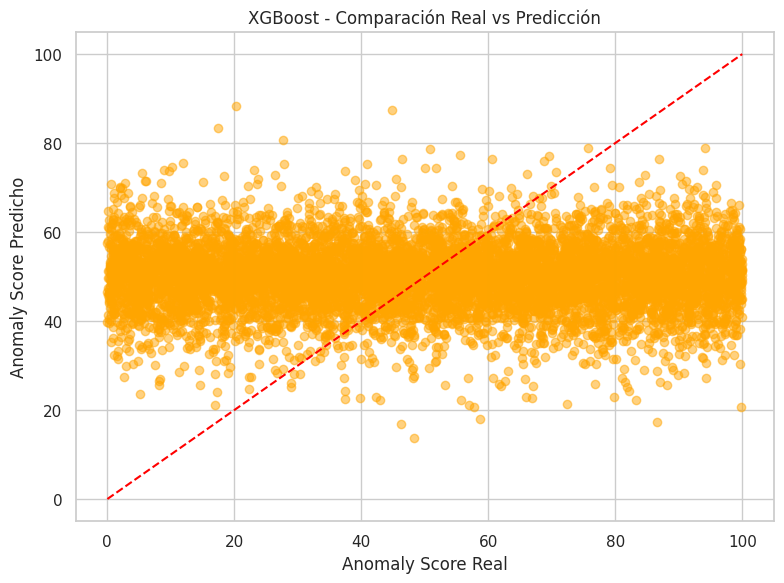

In [34]:
# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(yr_test, yr_pred, alpha=0.5, color="orange")
plt.plot([yr_test.min(), yr_test.max()], [yr_test.min(), yr_test.max()], 'r--')  # línea de referencia
plt.xlabel("Anomaly Score Real")
plt.ylabel("Anomaly Score Predicho")
plt.title("XGBoost - Comparación Real vs Predicción")
plt.tight_layout()
plt.show()


# **Conclusiones**

## Conclusión Modelo de Clasificación

El modelo de clasificación basado en **Random Forest** demostró un mal desempeño para predecir la variable **“Action Taken”**, mostrando una **baja precisión y capacidad de generalización**. Las métricas analizadas muestran mala predicciones y un muy bajo rendimiento en la clasificación.
La matriz de confusión reveló que las clases mayoritarias fueron bien reconocidas por el modelo, aunque las clases menos frecuentes presentaron ciertos errores de clasificación, lo cual es esperable dada la posible desproporción en la distribución de clases. Este modelo no es adecuado para predecir como responder automáticamente frente a eventos sospechosos en tiempo real, se debería analizar la utilización de otros modelos para hallar el más adecuado.

## Conclusión Modelo de Regresión

En este caso, se entrenaron dos modelos de regresión para predecir la **“Anomaly Score”**: uno basado en **Random Forest** y otro en **XGBoost**. Si bien ambos modelos fueron capaces de capturar parte de la variabilidad del puntaje de anomalía, ninguno de los modelos mostró un mejor desempeño, ambos presentaron un bajo error absoluto medio (MAE), un bajo error cuadrático medio (RMSE) y un coeficiente R² próximo a cero. Esto sugiere que los modelos no lograron captar los patrones del dataset, resultando poco preciso en la estimación del nivel de anomalía de cada evento.

## Conclusión General

El análisis permitió no solo visualizar patrones en los datos, sino también entrenar modelos predictivos. Como se pudo observar, los modelos seleccionados no lograron predecir de manera eficiente los futuros eventos, por lo que se requiere de un estudio mucho más exhaustivo para lograr encontrar los modelos que se adapten correctamente a cada caso, que permitan ser implementarlos como soporte para la detección temprana de ciberataques. La combinación de visualizaciones, modelos de clasificación y regresión proporciona una base sólida para tomar decisiones basadas en datos.